In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from spacetime import SpaceTime, Infer, RobustRegressionTest

## Spacetime Graphs: Examples

### Example 1

#### Arbitrary spacetime graph

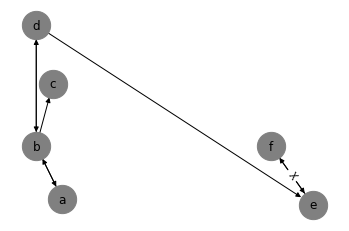

In [4]:
g = SpaceTime(node_dict = {0:['a','b','c','d'],
                           1:['e','f']})
g.add_edge('a','b')
g.add_edge('b','a')
g.add_edge('b','c')
g.add_edge('b','d')
g.add_edge('d','b')
g.add_edge('d','e')
g.add_edge('e','f', causal=False)
g.add_edge('f','e')
g.draw_graph()

In [5]:
g.is_causal('b','e')
g.is_causal('b','f')

True

False

#### Infer time ordering from edges and re-draw graph

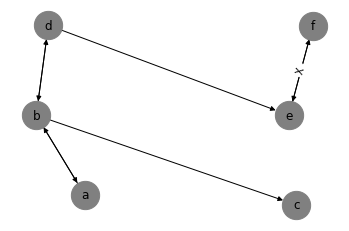

In [6]:
g.infer_order()
g.draw_graph()

### Example 2

#### Spacetime graph with structure

In [7]:
node_dict_1 = dict(zip(range(4), [['x%s_%s'%(i, j) for i in range(3)] for j in range(4)]))
data_1 = pd.DataFrame(columns = [item for sublist in node_dict_1.values() for item in sublist])

node_dict_1
data_1.head()

{0: ['x0_0', 'x1_0', 'x2_0'],
 1: ['x0_1', 'x1_1', 'x2_1'],
 2: ['x0_2', 'x1_2', 'x2_2'],
 3: ['x0_3', 'x1_3', 'x2_3']}

,x0_0,x1_0,x2_0,x0_1,x1_1,x2_1,x0_2,x1_2,x2_2,x0_3,x1_3,x2_3


#### Initialize a graph inferring time-order from node-dictionary

In [8]:
[['x0','x1'], ['x2','x3']]

[['x0', 'x1'], ['x2', 'x3']]

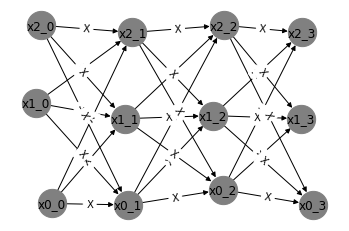

In [9]:
g1 = Infer(SpaceTime(node_dict_1), data_1, algorithm = 'IC', dseparation_test = RobustRegressionTest)
g1.initialize_graph(timing=True)
g1.st.draw_graph()

In [10]:
import networkx as nx

In [11]:
nx.to_numpy_array(g1.st.graph)

array([[0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Example 3

#### Define unstructured spacetime graph and generate associated toy data

In [12]:
node_dict_2 = {0: ['x0','x1','x2','x3','x4']}

# generate toy data:
SIZE = 2000
x0 = np.random.normal(size=SIZE)
x1 = x0 + np.random.normal(size=SIZE)
x2 = x0 + np.random.normal(size=SIZE)
x3 = x1 + x2 + np.random.normal(size=SIZE)
x4 = x3 + np.random.normal(size=SIZE)

# load the data into a dataframe:
data_2 = pd.DataFrame(dict(zip(node_dict_2[0], [x0,x1,x2,x3,x4])))

#### Initialize and draw graph

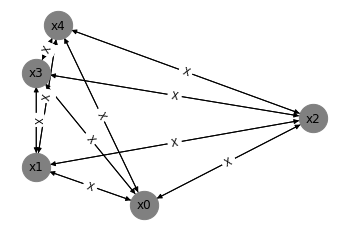

In [13]:
g2 = Infer(SpaceTime(node_dict_2), data_2, algorithm = 'IC', dseparation_test = RobustRegressionTest)
g2.initialize_graph()
g2.st.draw_graph()

#### Perform d-separation test

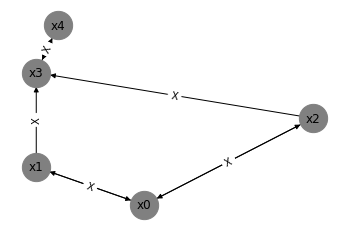

In [14]:
g2.d_separate()
g2.st.draw_graph()

#### Perform latent variable inference

In [15]:
g2.infer_latent()


#### Infer time-ordering from partially directed graph and re-draw

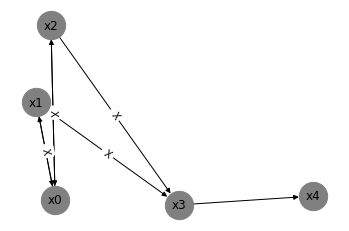

In [16]:
g2.st.infer_order()
g2.st.time_order_nodes()
g2.st.draw_graph()

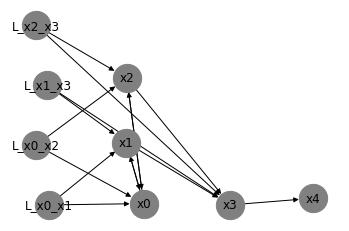

In [17]:
g2.model_latent()
g2.st.draw_graph()

### Example 4

In [18]:
graph_type = 'erdos-renyi'
# graph_type = 'full'
sem_type = 'linear-gauss'
linear_type = 'nonlinear_2'
sample_size = 1000
variable_size = 6
degree = 3
x_dims = 1

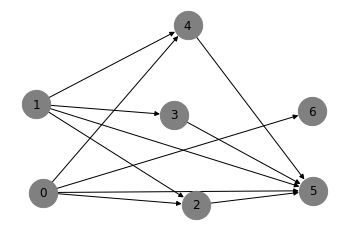

array([[[-0.04846434],
        [ 0.19829972],
        [-3.73728262],
        [ 0.3450328 ],
        [ 4.50830327],
        [ 2.47303528],
        [-3.96324332]],

       [[-1.24139426],
        [ 0.11900865],
        [-3.56642264],
        [-1.54780163],
        [-3.11887753],
        [ 5.81762446],
        [ 1.79920147]]])

array([[ 0.        ,  0.        ,  0.71058041,  0.        ,  1.70111685,
         1.95239236, -0.97013627],
       [ 0.        ,  0.        , -1.84191   , -0.62756632,  0.55858217,
        -0.75474563,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.97327345,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.92066599,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.69504286,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [19]:
node_dict = {0:[0,1], 1:[2,3,4], 2:[5,6]}
g3 = SpaceTime(node_dict)
g3.generate_ordered(degree, graph_type, seed=1)
g3.generate_data(sample_size, x_dims, sem_type, linear_type)
g3.time_order_nodes()
g3.draw_graph()
g3.data[:2]
g3.ordered_adj()

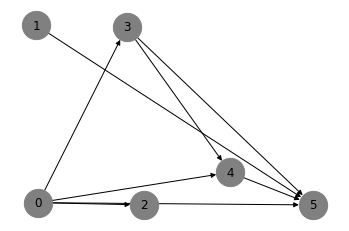

array([[[ 1.25925994],
        [ 0.08672983],
        [-5.88521386],
        [ 1.18357026],
        [ 3.78017129],
        [ 9.98871925]],

       [[ 0.67878149],
        [ 0.45628701],
        [-2.62524779],
        [-1.14320098],
        [ 4.16777323],
        [ 9.40280037]]])

array([[ 0.        ,  0.        ,  1.41959519,  1.9547136 ,  1.47971005,
        -1.85352287],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.43526515],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.51048945,
         1.4937903 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.26443657],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [20]:
g4 = SpaceTime()
g4.generate_random(variable_size, degree, graph_type)
g4.generate_data(sample_size, x_dims, sem_type, linear_type)
g4.time_order_nodes()
g4.draw_graph()
g4.data[:2]
g4.ordered_adj()